# KNN on Breast Cancer Dataset by David Smolinski
What this adds to my portfolio:
- machine learning
- k-nearest neighbors
- stratified k-fold cross-validation

Goal:
Make a model for predicting breast cancer based on 4 features (age, BMI, glucose, insulin). These predictions could be used to determine whether to do future blood tests.
- k-nearest neighbors
- stratified k-fold cross-validation

Links:
- [my portfolio](https://github.com/DavidSmolinski/portfolio)
- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra)
- [the csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv)
- I used a lot of Kevin Markham's code from [here](https://github.com/justmarkham/scikit-learn-videos/blob/master/08_grid_search.ipynb) and [here](https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb).

In [51]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix, roc_curve

In [52]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv', delimiter=',')
# df = pd.read_csv('dataR2.csv', delimiter=',')
pd.set_option('display.max_columns', None)
df = df.rename(columns={'Classification': 'has_cancer'})

#### Feature Selection
These 4 features are cheap. Cancer should be ruled out with cheap tests to reduce expensive tests. I did not do advanced feature selection by price and correlation.

In [53]:
features = ['Age', 'BMI', 'Glucose', 'Insulin']  # breast cancer risk tests
x = df[features]
y = df.has_cancer  # healthy=1, has_cancer=2

We will want to optimize the model for sensitivity. We could do this in GridSearchCV with "scoring='recall'". Instead, we optimize for accuracy, and later change the threshold for high sensitivity.

In [54]:
knn=KNeighborsClassifier()
k_vals = list(range(1,31))
weight_options = ['uniform', 'distance']
# param_grid={'n_neighbors':k_vals}
param_grid={'n_neighbors': k_vals, 'weights': weight_options}
grid = GridSearchCV(knn, param_grid, cv=2, scoring='accuracy')
grid.fit(x,y)
results = pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]
results

,mean_test_score,std_test_score,params
0,0.620690,0.068966,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.620690,0.068966,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.577586,0.025862,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.620690,0.068966,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.732759,0.043103,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.715517,0.043103,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.715517,0.025862,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.732759,0.043103,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.706897,0.034483,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.724138,0.034483,"{'n_neighbors': 5, 'weights': 'distance'}"


In [55]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7327586206896551
{'n_neighbors': 3, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


In [56]:
def cancer(n):
    if n == 1:
        return 'cancer-'
    elif n == 2:
        return 'cancer+'
    else:
        return 'error'


row = 0
row_pred = cancer(grid.predict([x.loc[row]]))
row_actual = cancer(y.loc[row])
print(f'cancer for row {row}:\nprediction: {row_pred}\nactual: {row_actual}')

cancer for row 0:
prediction: cancer+
actual: cancer-


In [57]:
y_pred = grid.predict(x)


def confusion(y_true=y, y_pred=y_pred, labels=[1,2]):
    conf_m = confusion_matrix(y_true=y, y_pred=y_pred, labels=labels)  # [[TN, FP], [FN, TP]]
    print(f'confusion matrix:\n{conf_m}')
    TN = conf_m[0,0]
    FP = conf_m[0,1]
    FN = conf_m[1,0]
    TP = conf_m[1,1]
    print(f'sensitivity: {TP/(TP+FN)}')
    print(f'specificity: {TN/(TN+FP)}')
    
    
confusion()

confusion matrix:
[[43  9]
 [ 8 56]]
sensitivity: 0.875
specificity: 0.8269230769230769


In [58]:
print(f'predictions (1 = cancer-, 2 = cancer+):\n\nfor actual cancer-:\n{y_pred[:first_cancer_i]}\
        \n\nfor actual cancer+:\n{y_pred[first_cancer_i:]}')

predictions (1 = cancer-, 2 = cancer+):

for actual cancer-:
[2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 2 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1]        

for actual cancer+:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2]


In [59]:
# probabilities of getting 2 (cancer+)
y_pred_prob = grid.predict_proba(x)[:,1]  # 2nd column of the probabilities array

first_cancer_i = 52  # This dataset came sorted with cancer- rows first.
print(f'probabilities of cancer-:\n{y_pred_prob[:first_cancer_i]}\
        \n\nprobabilities of cancer+:\n{y_pred_prob[first_cancer_i:]}')

probabilities of cancer-:
[0.66666667 0.         0.         0.33333333 0.         0.66666667
 0.         0.66666667 0.33333333 0.33333333 0.         0.
 0.         0.         0.33333333 0.33333333 0.33333333 0.66666667
 0.33333333 0.         0.         0.         0.         0.
 0.66666667 0.33333333 0.33333333 0.         0.         0.
 0.33333333 0.33333333 0.         0.66666667 0.66666667 0.33333333
 0.33333333 0.33333333 0.66666667 0.         0.         0.
 0.         0.33333333 0.33333333 0.33333333 0.         0.
 0.33333333 0.         0.66666667 0.        ]        

probabilities of cancer+:
[1.         0.66666667 1.         0.66666667 1.         1.
 0.66666667 1.         1.         1.         0.66666667 0.66666667
 1.         1.         0.33333333 1.         0.66666667 1.
 1.         1.         1.         1.         1.         1.
 0.66666667 1.         1.         0.66666667 0.33333333 0.66666667
 0.66666667 1.         1.         0.33333333 1.         1.
 1.         1.         1.  

Text(0, 0.5, 'Frequency')

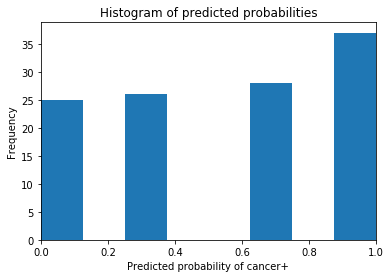

In [60]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of cancer+')
plt.ylabel('Frequency')

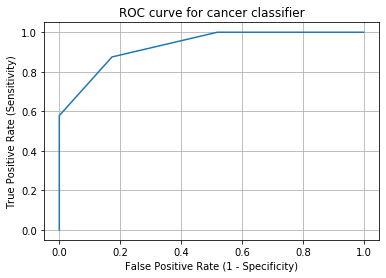

In [61]:
fpr, tpr, thresholds = roc_curve(y, y_pred_prob, pos_label=2)
plt.plot(fpr, tpr)
plt.title('ROC curve for cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [62]:
thresholds

array([2.        , 1.        , 0.66666667, 0.33333333, 0.        ])

A threshold is set to increase sensitivity. It is most important to minimize false negatives. For actual cancer+ (people who have cancer) the consequence of falsely predicting cancer- (no cancer) is high.

In [63]:
y_pred = binarize([y_pred_prob], thresholds[3]*.9999)[0]
print(f'predictions (0. = cancer-, 1. = cancer+):\n\nfor actual cancer-:\n{y_pred[:first_cancer_i]}\
        \n\nfor actual cancer+:\n{y_pred[first_cancer_i:]}')

predictions (0. = cancer-, 1. = cancer+):

for actual cancer-:
[1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 0.]        

for actual cancer+:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


dataset citations:

Miguel Patrício(miguelpatricio '@' gmail.com), José Pereira (jafcpereira '@' gmail.com), Joana Crisóstomo (joanacrisostomo '@' hotmail.com), Paulo Matafome (paulomatafome '@' gmail.com), Raquel Seiça (rmfseica '@' gmail.com), Francisco Caramelo (fcaramelo '@' fmed.uc.pt), all from the Faculty of Medicine of the University of Coimbra and also Manuel Gomes (manuelmgomes '@' gmail.com) from the University Hospital Centre of Coimbra